<a href="https://colab.research.google.com/github/cosimo-schiavoni/Massive_Data_Project/blob/main/Cats_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Wed Jul  6 09:28:18 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install tensorframes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!wget -q https://www-eu.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz
!tar xf spark-3.2.1-bin-hadoop2.7.tgz
!rm spark-3.2.1-bin-hadoop2.7.tgz
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!pip install findspark
!pip install pyspark
!pip install -q kaggle
#!pip install elephas
!pip install sparkdl
!pip install tensorframes
!pip install petastorm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 55 kB/s 
     |████████████████████████████████| 199 kB 62.1 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=e2c0ce69181748b6b9f84ebb7af85d823a204d33499b90e1e9eda248a9215b07
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 99 kB 4.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████|

In [3]:
# Keras / Deep Learning
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras import optimizers, regularizers
from tensorflow.keras.optimizers import Adam

In [4]:
from functools import reduce
from google.colab import files
import os
import zipfile
import numpy as np

#from my model
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import pickle
import shutil
import random
import skimage.io as io
from copy import deepcopy



In [5]:
import os
import zipfile
os.environ["data_source"] = "./Cats_Dogs_data"

if not os.path.exists(os.environ["data_source"]):
  os.makedirs(os.environ["data_source"])
  if "download" not in os.listdir():
    if "download.zip" not in os.listdir():
      ! wget https://unimibox.unimi.it/index.php/s/eNGYGSYmqynNMqF/download/CatsDogs.zip
      with zipfile.ZipFile("CatsDogs.zip", 'r') as f:
        f.extractall("CatsDogs")
    os.remove("CatsDogs.zip")


!mv "./CatsDogs/CatsDogs/Cats" "./Cats_Dogs_data"
!mv "./CatsDogs/CatsDogs/Dogs" "./Cats_Dogs_data"

!rm -rf CatsDogs

--2022-07-06 09:29:49--  https://unimibox.unimi.it/index.php/s/eNGYGSYmqynNMqF/download/CatsDogs.zip
Resolving unimibox.unimi.it (unimibox.unimi.it)... 159.149.53.190
Connecting to unimibox.unimi.it (unimibox.unimi.it)|159.149.53.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘CatsDogs.zip’

CatsDogs.zip            [            <=>     ] 812.79M  1.47MB/s    in 3m 58s  

2022-07-06 09:33:48 (3.42 MB/s) - ‘CatsDogs.zip’ saved [852272294]



In [7]:
os.path.getsize('./Cats_Dogs_data/Cats/666.jpg')

0

In [17]:
import os
import cv2
import imghdr
from PIL import Image

def check_images( s_dir, ext_list):
    bad_images=[]
    bad_ext=[]
    s_list= os.listdir(s_dir)
    for klass in s_list:
        klass_path=os.path.join (s_dir, klass)
        print ('processing class directory ', klass)
        if os.path.isdir(klass_path):
            file_list=os.listdir(klass_path)
            for f in file_list:               
                f_path=os.path.join (klass_path,f)
                tip = imghdr.what(f_path)
                ######################## get width and height
                if (ext_list.count(tip) == 0) or (not (os.path.getsize(f_path) > 100)) or (not (Image.open(f_path).width > 350 and Image.open(f_path).height > 350)):
                  bad_images.append(f_path)
                  os.remove(f_path)   
                if os.path.isfile(f_path):
                    try:
                        img=cv2.imread(f_path)
                        shape=img.shape
                    except:
                        print('file ', f_path, ' is not a valid image file')
                        bad_images.append(f_path)
                        os.remove(f_path)
                else:
                    print('discard ', f, ' in class directory ', klass)
        else:
            print ('*** WARNING*** you have files in ', s_dir, ' it should only contain sub directories')
    return bad_images, bad_ext

source_dir =r'./Cats_Dogs_data'
good_exts=['jpg', 'png', 'jpeg', 'gif', 'bmp' ] # list of acceptable extensions
bad_file_list, bad_ext_list=check_images(source_dir, good_exts)
if len(bad_file_list) !=0:
    print('improper image files are listed below')
    for i in range (len(bad_file_list)):
        print (bad_file_list[i])
else:
    print(' no improper image files were found')


processing class directory  Cats
processing class directory  Dogs
 no improper image files were found


In [18]:
#data augmentation

@tf.function
def random_invert_img(x, p=0.5):
  if  tf.random.uniform([]) < p:
    x = (180-x)
  else:
    x
  return x

###Randim invert
@tf.function 
def random_invert(factor=0.5):
  return layers.Lambda(lambda x: random_invert_img(x, factor))

#@tf.function 
class RandomInvert(layers.Layer):
  @tf.function 
  def __init__(self, factor=0.5, **kwargs):
    super().__init__(**kwargs)
    self.factor = factor
  @tf.function 
  def call(self, x):
    return random_invert_img(x)


###Kernel Inizializer Sobel_x
@tf.function 
def hedge_detector(shape, dtype=None):
    print(shape)    
    sobel_x = tf.constant(
        [
            [-5, -4, 0, 4, 5], 
            [-8, -10, 0, 10, 8], 
            [-10, -20, 0, 20, 10], 
            [-8, -10, 0, 10, 8], 
            [-5, -4, 0, 4, 5]
        ], dtype=dtype )
    #create the missing dims.
    sobel_x = tf.reshape(sobel_x, (5, 5, 1, 1))

    print(tf.shape(sobel_x))
    #tile the last 2 axis to get the expected dims.
    sobel_x = tf.tile(sobel_x, (1, 1, shape[-2],shape[-1]))

    print(tf.shape(sobel_x))
    return sobel_x

@tf.function 
def vertical_detector(shape, dtype=None):
    print(shape)    
    sobel_x = tf.constant(
        [
            [1, 0, -1], 
            [1, 0, -1], 
            [1, 0, -1]
        ], dtype=dtype )
    #create the missing dims.
    sobel_x = tf.reshape(sobel_x, (3, 3, 1, 1))

    print(tf.shape(sobel_x))
    #tile the last 2 axis to get the expected dims.
    sobel_x = tf.tile(sobel_x, (1, 1, shape[-2],shape[-1]))

    print(tf.shape(sobel_x))
    return sobel_x

@tf.function 
def horizontal_detector(shape, dtype=None):
    print(shape)    
    sobel_x = tf.constant(
        [
            [1, 1, 1], 
            [0, 0, 0], 
            [-1, -1, -1]
        ], dtype=dtype )
    #create the missing dims.
    sobel_x = tf.reshape(sobel_x, (3, 3, 1, 1))

    print(tf.shape(sobel_x))
    #tile the last 2 axis to get the expected dims.
    sobel_x = tf.tile(sobel_x, (1, 1, shape[-2],shape[-1]))

    print(tf.shape(sobel_x))
    return sobel_x

In [19]:

def get_compiled_model():
    # Make a simple 2-layer densely-connected neural network.
        ###Create CNN
    #Initialize the CNN
    cnn = tf.keras.models.Sequential()
     
    cnn.add(tf.keras.Sequential([
      layers.RandomFlip("horizontal_and_vertical"),
      layers.RandomRotation(0.3),
        layers.RandomContrast(0.5, seed=None),
        RandomInvert(),
        layers.RandomZoom(height_factor=(-0.2, +0.3)),
        layers.RandomTranslation(height_factor=(-0.2, +0.3),width_factor=(-0.2, +0.3)),
        layers.Rescaling(1./255, offset= -1)
        ]))
    
    #DROPOUT
    #Introduce the Convolution layer with Kernel_initializer=Sobel_x
    #Convolution
    cnn.add(tf.keras.layers.Conv2D(32, kernel_size=5, strides=2, activation='relu',  input_shape = [350,350,3]))
    #Pooling
    cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))
    #Convolution
    cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3,  strides=2, activation = 'relu'))
    #Pooling
    cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))
    #Second Convolutional Layer
    cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 2,  strides=2, activation = 'relu'))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides=1, padding='same'))
    #Third Convolutional Layer
    #cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 2, activation = 'relu'))
    #cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides=2))
    #Flattening
    cnn.add(tf.keras.layers.Flatten())
    #Full Connection
    cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
    #DROPOUTS ok(0.1)
    cnn.add(tf.keras.layers.Dropout(0.1))
    #Output Layer
    cnn.add(tf.keras.layers.Dense(units=1, activation = 'sigmoid'))
    ###Training CNN
    #Compiling the CNN
    cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return cnn


def get_dataset():
    BUFFER_SIZE = 10000

    BATCH_SIZE_PER_REPLICA = 64
    BATCH_SIZE = BATCH_SIZE_PER_REPLICA * strategy.num_replicas_in_sync

    data_dir= "./Cats_Dogs_data"

    tf.random.set_seed(123456)

    EPOCHS = 15
    #BATCH_SIZE = 32
    #IMG_SIZE = (160, 160)
    IMG_SIZE = (350, 350)

    os.listdir(data_dir)


    train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        validation_split=0.3,
        subset="training",
        shuffle=True,
        seed=123456,
        image_size= IMG_SIZE,
        batch_size=BATCH_SIZE)


    validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        validation_split=0.3,
        subset="validation",
        shuffle=True,
        seed=123456,
        image_size= IMG_SIZE,
        batch_size=BATCH_SIZE)
    
    val_batches = tf.data.experimental.cardinality(validation_dataset)
    test_dataset = validation_dataset.take(val_batches // 5)
    validation_dataset = validation_dataset.skip(val_batches // 5)
    print('Number of training batches: %d' % tf.data.experimental.cardinality(train_dataset))
    print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
    print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

    AUTOTUNE = tf.data.AUTOTUNE

    train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
    validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
    test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

    return (
        train_dataset,
        validation_dataset,
        test_dataset
    )




In [20]:
# Create a MirroredStrategy.
strategy = tf.distribute.MirroredStrategy()
print("Number of devices: {}".format(strategy.num_replicas_in_sync))


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Number of devices: 1


In [21]:

# Open a strategy scope.
with strategy.scope():
    # Everything that creates variables should be under the strategy scope.
    # In general this is only model construction & `compile()`.
    model = get_compiled_model()


In [22]:

# Train the model on all available devices.
train_dataset, validation_dataset, test_dataset = get_dataset()
model_fit = model.fit(train_dataset, epochs=15, validation_data=validation_dataset)
model_fit

Found 13540 files belonging to 2 classes.
Using 9478 files for training.
Found 13540 files belonging to 2 classes.
Using 4062 files for validation.
Number of training batches: 149
Number of validation batches: 52
Number of test batches: 12
Epoch 1/15
149/149 [==============================] - 51s 232ms/step - loss: 0.6959 - accuracy: 0.5152 - val_loss: 0.6949 - val_accuracy: 0.5039
Epoch 2/15
149/149 [==============================] - 34s 224ms/step - loss: 0.6930 - accuracy: 0.5089 - val_loss: 0.6915 - val_accuracy: 0.5067
Epoch 3/15
149/149 [==============================] - 34s 225ms/step - loss: 0.6920 - accuracy: 0.5171 - val_loss: 0.6923 - val_accuracy: 0.5067
Epoch 4/15
149/149 [==============================] - 35s 229ms/step - loss: 0.6920 - accuracy: 0.5242 - val_loss: 0.6915 - val_accuracy: 0.5288
Epoch 5/15
149/149 [==============================] - 34s 223ms/step - loss: 0.6928 - accuracy: 0.5138 - val_loss: 0.7035 - val_accuracy: 0.5003
Epoch 6/15
149/149 [===============

In [23]:

# Test the model on all available devices.
model.evaluate(test_dataset)

12/12 [==============================] - 3s 154ms/step - loss: 0.6558 - accuracy: 0.6263


[0.6558408141136169, 0.6263020634651184]

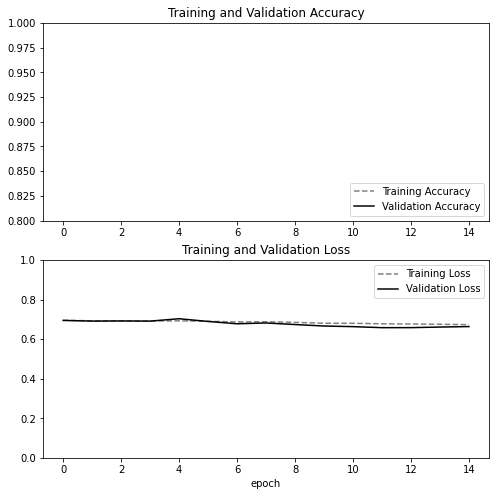

In [24]:
#There are two variable objects. Divided between around 2.5 million of MobilNet parameters which 
#are frozen, and 1.2 thousand of trainable parameter in the Dense layer
#len(cnn.trainable_variables)

acc = model_fit.history['accuracy']
val_acc = model_fit.history['val_accuracy']
loss_ = model_fit.history['loss']
val_loss_ = model_fit.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy', color = 'gray',linestyle='dashed')
plt.plot(val_acc, label='Validation Accuracy', color = 'black')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss_, label='Training Loss', color = 'gray',linestyle='dashed')
plt.plot(val_loss_, label='Validation Loss', color = 'black')
plt.ylim([0, 1.0])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()
